# **Aplicación del Modelo a los Datos de Input.**
En este notebook, aplicaremos el modelo de propensión de compra previamente entrenado y optimizado a un nuevo conjunto de datos de clientes. El objetivo principal es generar predicciones sobre la probabilidad de que un cliente adquiera un segundo vehículo, permitiendo segmentar y definir estrategias de marketing basadas en estos resultados.


## **Importación de librerías.**

In [3]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import joblib
import os
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## **Importación e información de Dataframes.**

In [4]:
df = pd.read_csv('../data/raw/IA_PROPENSITY_INPUT.csv', index_col=0)
df.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad_Cliente
CODE,,,,,,,,,,,,,,,,,,,,,
CLIX1,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lacoruna,SI,NO,NO,Medio,NO DATA,No,NO,2892,0,1,20
CLIX2,A,TIPO1,FUEL 1,Baja,M,Otros,SOLTERO,M,Empresa,Pontevedra,SI,NO,NO,Alto,SI,Averia leve,NO,2892,17967,1,55
CLIX3,A,TIPO1,FUEL 1,Baja,M,Contado,SOLTERO,F,Empresa,Toledo,NO,NO,NO,Medio-Bajo,NO DATA,Averia grave,NO,1376,0,1,18
CLIX4,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Valencia,NO,NO,NO,Alto,SI,No,NO,2594,6219,1,37
CLIX5,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,F,Empresa,Barcelona,SI,NO,NO,Medio-Bajo,NO DATA,Averia muy grave,SI,1376,0,1,21


In [5]:
df.shape

(11485, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11485 entries, CLIX1 to CLIX11485
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PRODUCTO         11485 non-null  object
 1   TIPO_CARROCERIA  11485 non-null  object
 2   COMBUSTIBLE      11485 non-null  object
 3   Potencia         11485 non-null  object
 4   TRANS            11485 non-null  object
 5   FORMA_PAGO       11485 non-null  object
 6   ESTADO_CIVIL     11321 non-null  object
 7   GENERO           11329 non-null  object
 8   OcupaciOn        11485 non-null  object
 9   PROVINCIA        11485 non-null  object
 10  Campanna1        11485 non-null  object
 11  Campanna2        11485 non-null  object
 12  Campanna3        11485 non-null  object
 13  Zona_Renta       8878 non-null   object
 14  REV_Garantia     11485 non-null  object
 15  Averia_grave     11485 non-null  object
 16  QUEJA_CAC        11485 non-null  object
 17  COSTE_VENTA      11485 non-n

In [7]:
null_percentage = (df.isnull().sum() / len(df)) * 100 # Porcentaje de valores nulos
null_percentage[null_percentage > 0]

ESTADO_CIVIL     1.427949
GENERO           1.358293
Zona_Renta      22.699173
dtype: float64

In [8]:
for col in df.select_dtypes(include=['object']).columns:
    print('{} : {}'.format(col,df[col].unique()))

PRODUCTO : ['A' 'B' 'C' 'H' 'J' 'D' 'I' 'E' 'K' 'G' 'F']
TIPO_CARROCERIA : ['TIPO1' 'TIPO6' 'TIPO4' 'TIPO7' 'TIPO8' 'TIPO2' 'TIPO5' 'TIPO3']
COMBUSTIBLE : ['FUEL 1' 'FUEL 2']
Potencia : ['Baja' 'Media' 'Alta']
TRANS : ['M' 'A']
FORMA_PAGO : ['Otros' 'Contado' 'Financiera Marca' 'Financiera Banco']
ESTADO_CIVIL : ['CASADO' 'SOLTERO' 'OTROS' 'EN PAREJA' nan]
GENERO : ['M' 'F' nan]
OcupaciOn : ['Empresa' 'Funcionario' 'Autonomo']
PROVINCIA : ['Lacoruna' 'Pontevedra' 'Toledo' 'Valencia' 'Barcelona' 'Zaragoza'
 'Madrid' 'Tarragona' 'Guadalajara' 'Vizcaya' 'Alicante' 'Leon' 'Gerona'
 'Malaga' 'Baleares' 'Ciudad Real' 'Granada' 'Alava'
 'Santa Cruz de Tenerife' 'Asturias' 'Burgos' 'Orense' 'Castellon'
 'Sevilla' 'Badajoz' 'Almeria' 'Lerida' 'Cantabria' 'Lugo' 'Cordoba'
 'Salamanca' 'Zamora' 'Albacete' 'Las Palmas' 'Jaen' 'Valladolid' 'Huesca'
 'Guipuzcua' 'Cadiz' 'Murcia' 'Navarra' 'Huelva' 'Segovia' 'Caceres'
 'Cuenca' 'La Rioja' 'Teruel' 'Palencia' 'Avila' 'Soria' 'Ceuta' 'Melilla']
Campann

Tras la inspección inicial, verificamos que la cantidad de valores nulos y los tipos de datos son consistentes con la limpieza predefinida en los scripts anteriores. Esto nos permite confirmar que el dataset de entrada se encuentra en un estado adecuado para continuar con el proceso de preprocesamiento y transformación en la siguiente fase.

## **Preprocesamiento de Datos.**
Una vez revisado el dataset, aplicaremos los scripts de preprocesamiento, feature engineering y transformación utilizados en la fase de entrenamiento.
- Aplicar la limpieza de datos.
- Realizar transformaciones necesarias (codificación de variables categóricas, escalado, etc.).
- Asegurar la compatibilidad con el modelo entrenado.

Utilizaremos los scripts previamente desarrollados:
- `data_preprocessor.py`: Limpieza de datos (basado en `01_recopilacion-datos.ipynb`).
- `data_feature_engineering.py`: Ingeniería de características (basado en `03_feature-engineering.ipynb`).

In [9]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../src")))
from data_preprocessor import DataPreprocessor
from data_feature_engineering import FeatureEngineering

In [10]:
# Preprocesamiento de datos.
preprocessor = DataPreprocessor(df)
df = preprocessor.preprocess()
df.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad_Cliente
CODE,,,,,,,,,,,,,,,,,,,,,
CLIX1,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lacoruna,SI,NO,NO,Medio,NO DATA,No,NO,2892,0,1,20
CLIX2,A,TIPO1,FUEL 1,Baja,M,Otros,SOLTERO,M,Empresa,Pontevedra,SI,NO,NO,Alto,SI,Averia leve,NO,2892,17967,1,55
CLIX3,A,TIPO1,FUEL 1,Baja,M,Contado,SOLTERO,F,Empresa,Toledo,NO,NO,NO,Medio-Bajo,NO DATA,Averia grave,NO,1376,0,1,18
CLIX4,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Valencia,NO,NO,NO,Alto,SI,No,NO,2594,6219,1,37
CLIX5,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,F,Empresa,Barcelona,SI,NO,NO,Medio-Bajo,NO DATA,Averia muy grave,SI,1376,0,1,21


In [11]:
df.to_csv('../data/cleaned/IA_PROPENSITY_INPUT.csv')

In [12]:
# Ingeniería de características.
feature_engineer = FeatureEngineering(df)
df_modelo = feature_engineer.transform()
df_modelo.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad_Cliente,COMUNIDAD_AUT
CODE,,,,,,,,,,,,,,,,,,,,,
CLIX1,0,0,0,0.0,1,2,0,1,1,1,0,0,3.0,0,0.0,0,2892,0,1,0,11
CLIX2,0,0,0,0.0,1,2,3,1,1,1,0,0,4.0,1,1.0,0,2892,17967,1,2,11
CLIX3,0,0,0,0.0,1,0,3,0,1,0,0,0,2.0,0,2.0,0,1376,0,1,0,6
CLIX4,0,0,0,0.0,1,0,0,0,1,0,0,0,4.0,1,0.0,0,2594,6219,1,1,17
CLIX5,0,0,0,0.0,1,2,0,0,1,1,0,0,2.0,0,3.0,1,1376,0,1,0,8


In [13]:
df_modelo.to_csv('../data/processed/IA_PROPENSITY_INPUT.csv')

## **Aplicación del Modelo al Dataset Input.**
Ahora que los datos han sido limpiados y preparados mediante las fases anteriores, pasamos a aplicar el modelo XGBoost previamente seleccionado y entrenado. En esta fase, vamos a:
- Cargar el modelo previamente entrenado.
- Aplicar el modelo al dataset input procesado.
- Generar predicciones y probabilidades de compra.
- Analizar y visualizar los resultados.


In [14]:
# Cargar el modelo previamente entrenado
modelo_xgb = joblib.load("../models/xgboost.pkl")
modelo_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [15]:
# Predicciones de probabilidad.
y_pred_proba = modelo_xgb.predict_proba(df_modelo)[:, 1]

# Aplicación del umbral óptimo (según lo definido en el análisis anterior).
umbral_optimo = 0.59
y_pred = (y_pred_proba >= umbral_optimo).astype(int)

### **Cálculo de las probabilidades y predicciones.**

In [16]:
df["Probabilidad_Compra"] = y_pred_proba
df["Prediccion_Compra"] = y_pred

In [17]:
df.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad_Cliente,Probabilidad_Compra,Prediccion_Compra
CODE,,,,,,,,,,,,,,,,,,,,,,,
CLIX1,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lacoruna,SI,NO,NO,Medio,NO DATA,No,NO,2892,0,1,20,0.895969,1
CLIX2,A,TIPO1,FUEL 1,Baja,M,Otros,SOLTERO,M,Empresa,Pontevedra,SI,NO,NO,Alto,SI,Averia leve,NO,2892,17967,1,55,0.885121,1
CLIX3,A,TIPO1,FUEL 1,Baja,M,Contado,SOLTERO,F,Empresa,Toledo,NO,NO,NO,Medio-Bajo,NO DATA,Averia grave,NO,1376,0,1,18,0.007335,0
CLIX4,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Valencia,NO,NO,NO,Alto,SI,No,NO,2594,6219,1,37,0.649096,1
CLIX5,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,F,Empresa,Barcelona,SI,NO,NO,Medio-Bajo,NO DATA,Averia muy grave,SI,1376,0,1,21,0.213111,0


### **Visualización de Resultados.**

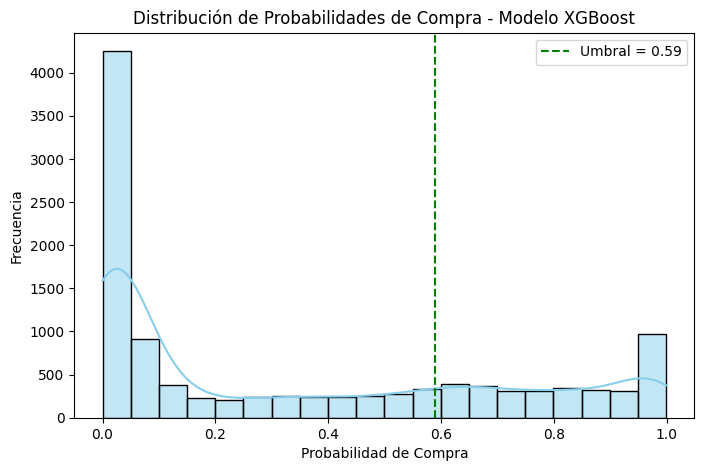

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred_proba, bins=20, color="skyblue", kde=True)
plt.axvline(x=umbral_optimo, color="green", linestyle="--", label=f"Umbral = {umbral_optimo}")
plt.xlabel("Probabilidad de Compra")
plt.ylabel("Frecuencia")
plt.title("Distribución de Probabilidades de Compra - Modelo XGBoost")
plt.legend()
plt.show()

### **Evaluación del Modelo en Input.**
Ya que estamos aplicando el modelo a un nuevo conjunto de datos y no tenemos las etiquetas reales de compra, no podemos calcular métricas como Recall o AUC directamente. Sin embargo, podemos analizar la proporción de clientes predichos como compradores.

In [19]:
# Calcular la proporción de clientes predichos como compradores.
print(f"Proporción de clientes con Predicción de Compra:", round(df["Prediccion_Compra"].mean()*100, 2), "%")

Proporción de clientes con Predicción de Compra: 30.32 %


## **Segmentación de clientes y estrategias de marketing basadas en la propensión de compra.**
Ahora que hemos aplicado el modelo XGBoost al dataset de entrada, vamos a segmentar a los clientes según su probabilidad de compra y definir estrategias de marketing personalizadas.

**Objetivo de la Segmentación.**
- Clasificar a los clientes en distintos niveles de propensión de compra para optimizar las estrategias de marketing.
- Asignar diferentes estrategias comerciales según el nivel de confianza en la predicción del modelo.

### **Aplicación de la Segmentación.**
Basándonos en los resultados de la matriz de confusión, se establecieron tres segmentos con umbrales diferenciados:
- **Clientes Premium $(prob > 0.85)$**: Clientes con alta probabilidad de compra. Se recomienda una **estrategia de fidelización y exclusividad**, como ofertas personalizadas y programas de recompra.
- **Clientes Potencial e Intermedio $(0.15 < prob < 0.85)$**: Clientes con posibilidad media-alta de conversión. Se sugiere aplicar **incentivos como descuentos o financiamiento flexible** para aumentar la tasa de conversión.
- **Clientes con Baja Propensión $(prob < 0.15)$**: Clientes con poca intención de compra. Este segmento requiere **mínima inversión publicitaria**, priorizando estrategias automatizadas y de bajo costo, como emails informativos.


In [20]:
# Creación de la segmentación en base a la probabilidad de compra.
def segmentar_cliente(prob):
    if prob > 0.8:
        return "Premium"
    elif 0.8 >= prob > 0.6:
        return "Potencial"
    elif 0.6 >= prob > 0.15:
        return "Intermedio"
    else:
        return "Baja Propensión"

df["Segmento"] = df["Probabilidad_Compra"].apply(segmentar_cliente)
df["Segmento"].value_counts()

Segmento
Baja Propensión    5542
Intermedio         2265
Premium            1933
Potencial          1374
Name: count, dtype: int64

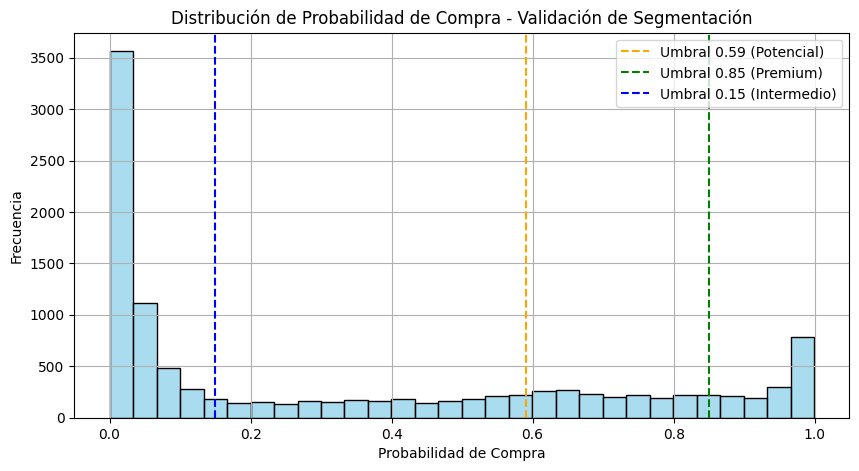

In [21]:
# Distribución de probabilidades de compra.
plt.figure(figsize=(10, 5))
sns.histplot(df["Probabilidad_Compra"], bins=30, color="skyblue", alpha=0.7)
plt.axvline(x=0.59, linestyle="--", color="orange", label="Umbral 0.59 (Potencial)")
plt.axvline(x=0.85, linestyle="--", color="green", label="Umbral 0.85 (Premium)")
plt.axvline(x=0.15, linestyle="--", color="blue", label="Umbral 0.15 (Intermedio)")
plt.xlabel("Probabilidad de Compra")
plt.ylabel("Frecuencia")
plt.title("Distribución de Probabilidad de Compra - Validación de Segmentación")
plt.legend()
plt.grid(True)
plt.show()

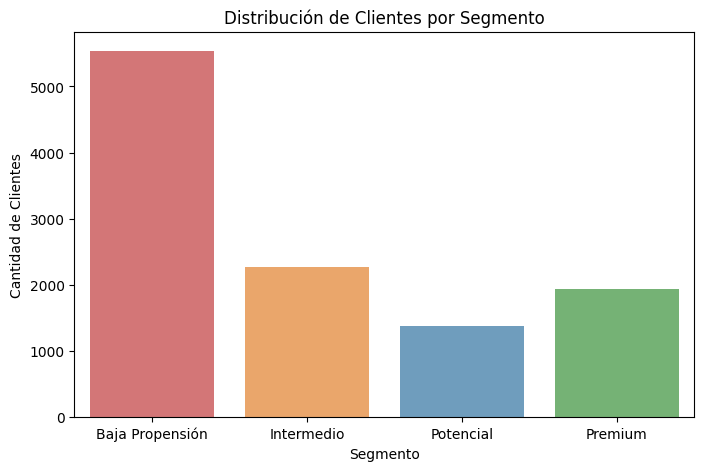

In [22]:
plt.figure(figsize=(8, 5))
segment_order = ["Baja Propensión", "Intermedio", "Potencial", "Premium"]
color_mapping = {
    "Baja Propensión": "#E26768",  # Rojo
    "Intermedio": "#FFA556",       # Naranja
    "Potencial": "#629FCA",        # Azul
    "Premium": "#6BBC6B"           # Verde
}

sns.countplot(data=df, x="Segmento", order=segment_order, hue="Segmento", palette=color_mapping)
plt.xlabel("Segmento")
plt.ylabel("Cantidad de Clientes")
plt.title("Distribución de Clientes por Segmento")
plt.show()


El gráfico confirma que la mayor parte de los clientes pertenecen al segmento de **Baja Propensión**, lo que sugiere que la mayoría de la base de datos presenta una baja probabilidad de compra. Sin embargo, los segmentos **Premium, Intermedio y Potencial** representan una oportunidad significativa para aplicar estrategias de marketing diferenciadas.

### **Estrategias de Marketing Según el Segmento.**
Cada segmento de clientes tiene diferentes necesidades, por lo que diseñaremos estrategias basadas en el nivel de confianza del modelo. Este análisis nos permite identificar cuántos clientes están en cada segmento. Dependiendo del volumen de clientes en cada categoría, podemos ajustar la inversión en cada estrategia.

In [23]:
# Mostrar resumen de cada segmento
segment_summary = df.groupby("Segmento").agg(
    Count=("Segmento", "count"),
    Avg_Probabilidad=("Probabilidad_Compra", "mean")
).reset_index()
segment_summary

,Segmento,Count,Avg_Probabilidad
0,Baja Propensión,5542,0.032255
1,Intermedio,2265,0.388673
2,Potencial,1374,0.694047
3,Premium,1933,0.926060


**Conclusiones.**
1. **Clientes con Baja Propensión.** Representan la mayor parte de la base de datos, pero su **probabilidad media de compra es baja**. Es importante evaluar **si vale la pena invertir en estos clientes** o si se requiere una estrategia de marketing diferenciada, como campañas educativas, remarketing o descuentos agresivos.

2. **Clientes Potenciales e Intermedios.** Tienen una probabilidad de compra **moderada**. Son un segmento clave en el que **podemos enfocar estrategias para aumentar la conversión**.

3. **Clientes Premium** Representan una **gran oportunidad comercial**, ya que su **probabilidad de compra es alta**. Se recomienda aplicar estrategias de **fidelización**, **programas de lealtad**, o **cross-selling** para maximizar el valor del cliente a largo plazo.

**Implementación en Marketing.**
- **Presupuesto de Marketing:** Asignar mayor inversión a **clientes Potenciales y Premium**, donde la probabilidad de conversión es más alta. Evaluar si los clientes de **Baja Propensión** pueden ser impactados con publicidad de bajo costo o estrategias de retención antes de descartarlos.
- **Segmentación Dinámica:** Se puede realizar un seguimiento a los clientes de **Baja Propensión** para ver si con el tiempo mejoran sus probabilidades. **Clientes Potenciales** podrían migrar a **Premium** con estrategias efectivas de engagement.
- **Prueba de Eficiencia:** Se recomienda realizar un **test A/B** para evaluar si los umbrales de segmentación están bien definidos y si las estrategias aplicadas tienen un impacto positivo en la conversión.

## **Evaluación de la Efectividad de la Estrategia y Simulación de Impacto Comercial.**
En esta fase, analizaremos la efectividad de la segmentación realizada en la fase anterior y realizaremos una simulación de impacto comercial para evaluar cómo cada estrategia afecta la rentabilidad del negocio.

### **Evaluación de la Precisión del Modelo en la Segmentación.**
Nos permitirá ver cómo se distribuyen los clientes en cada segmento según su probabilidad de compra.

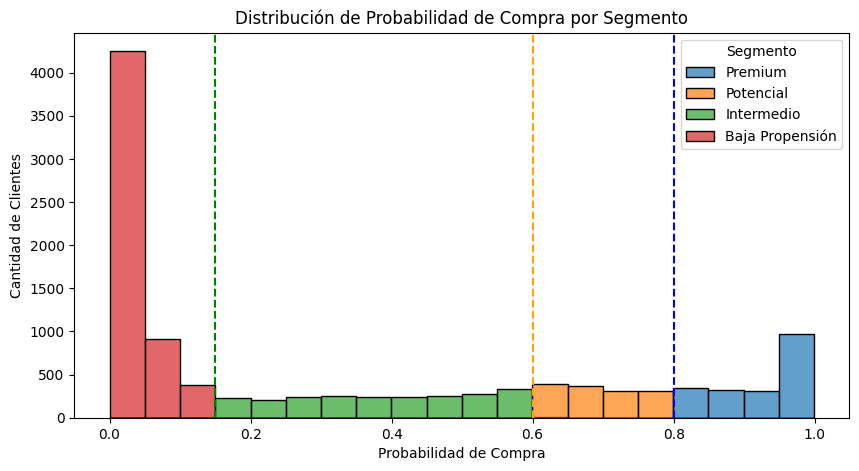

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Probabilidad_Compra", hue="Segmento", bins=20, alpha=0.7, hue_order=["Premium", "Potencial", "Intermedio", "Baja Propensión"])
plt.axvline(x=0.6, linestyle="--", color="orange", label="Umbral 0.59 (Potencial)")
plt.axvline(x=0.8, linestyle="--", color="blue", label="Umbral 0.8 (Premium)")
plt.axvline(x=0.15, linestyle="--", color="green", label="Umbral 0.15 (Intermedio)")
plt.xlabel("Probabilidad de Compra")
plt.ylabel("Cantidad de Clientes")
plt.title("Distribución de Probabilidad de Compra por Segmento")
plt.show()

**Interpretación.**
1. **Clientes con Baja Propensión.** Se agrupan principalmente en el extremo izquierdo (probabilidad cercana a 0). La distribución es **altamente sesgada hacia la baja probabilidad**, lo que sugiere que este grupo difícilmente realizará una compra.

2. **Clientes Potenciales.** Se encuentran distribuidos alrededor del umbral **0.5 - 0.7**. Este grupo muestra una mayor dispersión, lo que indica que algunos clientes podrían convertirse en compradores con la estrategia adecuada.

3. **Clientes Premium.** Están concentrados en el extremo derecho del gráfico (probabilidad cercana a 1).  Son los más propensos a comprar, lo que confirma la validez del segmento.

**Conclusión.** **Los segmentos parecen bien definidos**, ya que existe una diferenciación clara entre grupos. **No hay solapamiento significativo entre Premium y Baja Propensión**, lo que indica que los umbrales de 0.5 y 0.7 son razonables.

### **Simulación del Impacto Comercial.**
Para evaluar la efectividad comercial, definiremos una tasa de conversión estimada por segmento basada en datos históricos (calculados en la tabla de validación) y tendencias de la industria.
| Segmento         | Total Clientes | Clientes que compraron | Tasa de Conversión (%) |
|------------------|----------------|------------------------|------------------------|
| Baja Propensión  | 5600           | 34                     | 0.607143               |
| Intermedio       | 1973           | 461                    | 23.365433              |
| Potencial        | 2037           | 1102                   | 54.099165              |
| Premium          | 1605           | 1500                   | 93.457944              |

In [26]:
# Definir tasas de conversión estimadas (sin aplicación de estrategia de Marketing).
conversion_rates = {
    "Premium": 0.93,
    "Potencial": 0.54,
    "Intermedio": 0.23,
    "Baja Propensión": 0.006
}

# Número de clientes por segmento.
segment_counts = df["Segmento"].value_counts().reset_index()
segment_counts.columns = ["Segmento", "Clientes"]

# Número de clientes convertidos por segmento usando las tasas de conversión definidas.
segment_counts["Clientes_Convertidos_NE"] = segment_counts["Segmento"].map(conversion_rates) * segment_counts["Clientes"]

In [27]:
segment_counts

,Segmento,Clientes,Clientes_Convertidos_NE
0,Baja Propensión,5542,33.252
1,Intermedio,2265,520.950
2,Premium,1933,1797.690
3,Potencial,1374,741.960


#### **Do Nothing.**

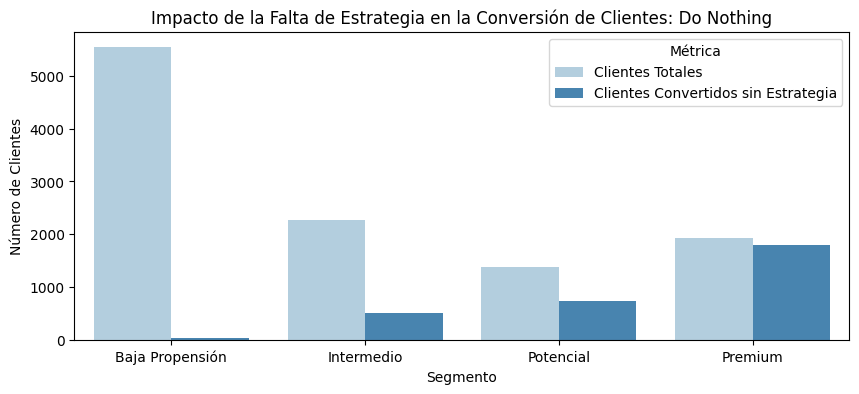

In [28]:
plt.figure(figsize=(10, 4))
sns.barplot(data=segment_counts.melt(id_vars="Segmento", value_vars=["Clientes", "Clientes_Convertidos_NE"]),
            x="Segmento", y="value", hue="variable", palette="Blues", dodge=True, errorbar=None, order=["Baja Propensión", "Intermedio", "Potencial", "Premium"])

plt.title("Impacto de la Falta de Estrategia en la Conversión de Clientes: Do Nothing")
plt.xlabel("Segmento")
plt.ylabel("Número de Clientes")
plt.legend(title="Métrica", labels=["Clientes Totales", "Clientes Convertidos sin Estrategia"])
plt.show()

#### **Análisis de Características Clave para la Estrategia de Marketing.**

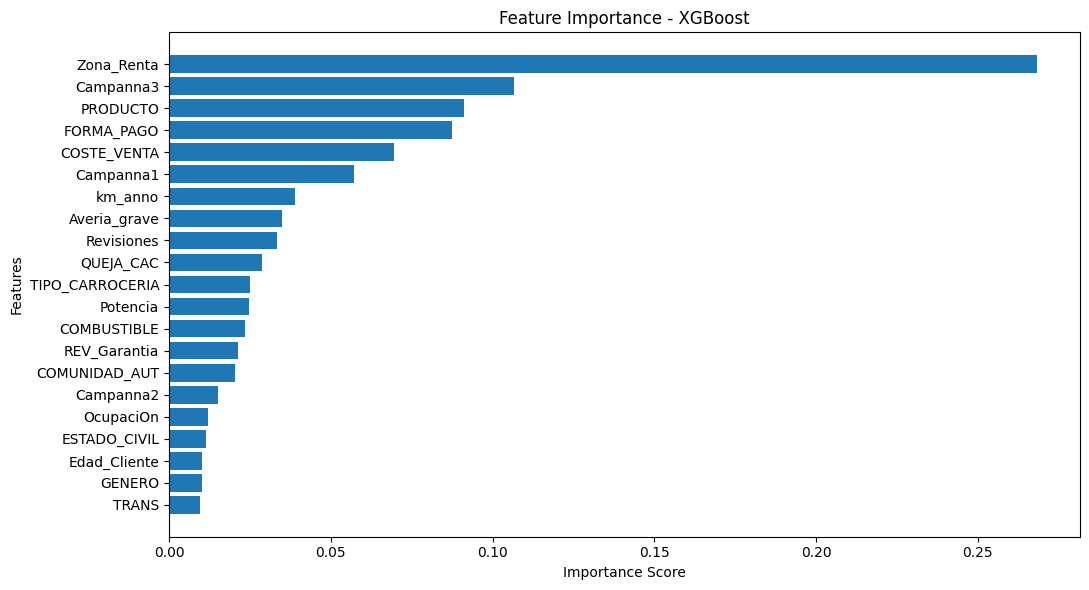

In [29]:
feature_importances = modelo_xgb.feature_importances_
importance_df = pd.DataFrame({
    'Feature': ['PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia', 'TRANS', 'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn', 'Campanna1', 'Campanna2', 'Campanna3', 'Zona_Renta', 'REV_Garantia', 'Averia_grave', 'QUEJA_CAC', 'COSTE_VENTA', 'km_anno', 'Revisiones', 'Edad_Cliente', 'COMUNIDAD_AUT'],
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(11, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance - XGBoost')
plt.tight_layout()
plt.show()

Las características más influyentes sugieren que **renta, incentivos financieros, garantías y modelo del vehículo** son clave en la toma de decisión de compra. Esto nos permite estructurar estrategias de marketing altamente personalizadas para cada segmento.

##### **Baja Propensión.**
Estos clientes tienen muy baja probabilidad de compra $(<15\%)$, por lo que no es rentable invertir muchos recursos en ellos. Sin embargo, podemos aplicar **estrategias de bajo costo** para mantenerlos en la órbita de la empresa y, eventualmente, convertir a algunos en compradores futuros.

In [2016]:
baja_propension = df[df['Segmento'] == 'Baja Propensión']

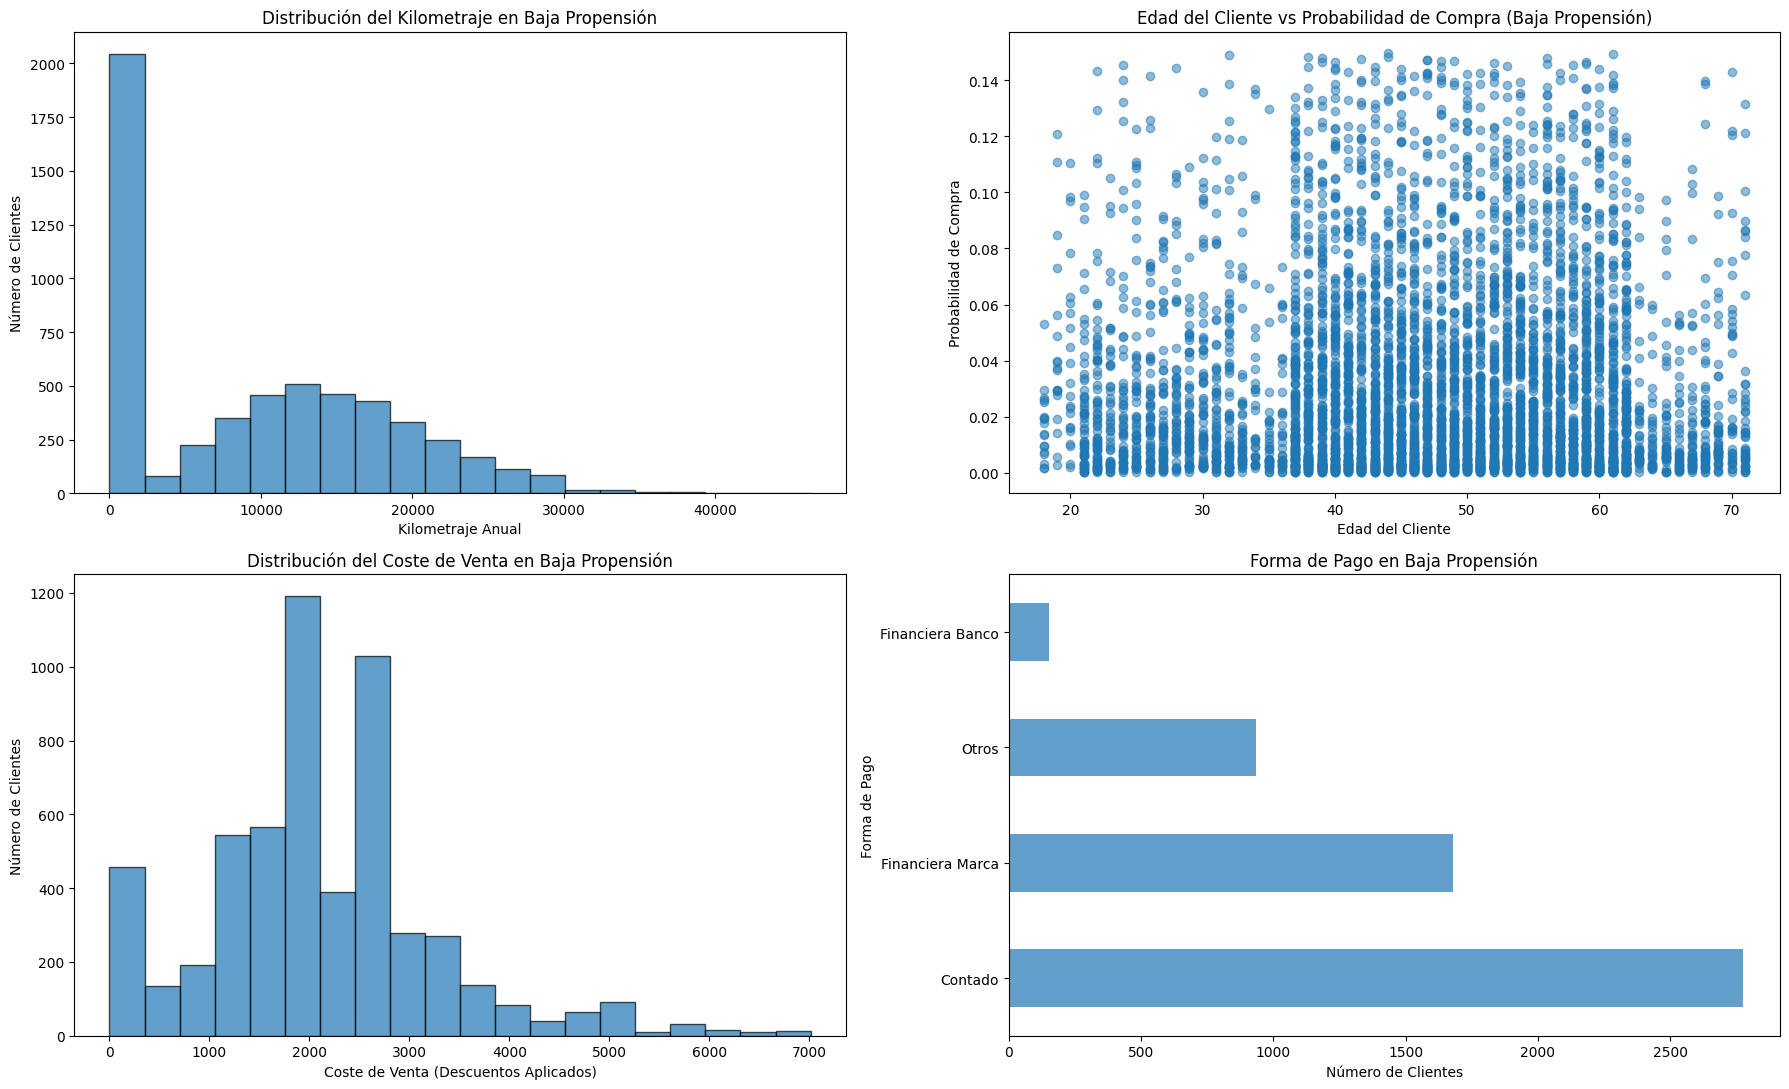

In [2017]:
fig, axs = plt.subplots(2, 2, figsize=(18, 11))

# Distribución del Kilometraje.
axs[0, 0].hist(baja_propension["km_anno"], bins=20, edgecolor='black', alpha=0.7)
axs[0, 0].set_title("Distribución del Kilometraje en Baja Propensión")
axs[0, 0].set_xlabel("Kilometraje Anual")
axs[0, 0].set_ylabel("Número de Clientes")

# Edad de Clientes.
axs[0, 1].scatter(baja_propension["Edad_Cliente"], baja_propension["Probabilidad_Compra"], alpha=0.5)
axs[0, 1].set_title("Edad del Cliente vs Probabilidad de Compra (Baja Propensión)")
axs[0, 1].set_xlabel("Edad del Cliente")
axs[0, 1].set_ylabel("Probabilidad de Compra")

# Coste de Venta.
axs[1, 0].hist(baja_propension["COSTE_VENTA"], bins=20, edgecolor='black', alpha=0.7)
axs[1, 0].set_title("Distribución del Coste de Venta en Baja Propensión")
axs[1, 0].set_xlabel("Coste de Venta (Descuentos Aplicados)")
axs[1, 0].set_ylabel("Número de Clientes")

# Forma de pago.
baja_propension["FORMA_PAGO"].value_counts().plot(kind='barh', alpha=0.7, ax=axs[1, 1])
axs[1, 1].set_title("Forma de Pago en Baja Propensión")
axs[1, 1].set_xlabel("Número de Clientes")
axs[1, 1].set_ylabel("Forma de Pago")

plt.tight_layout()
plt.show()

**Estrategias.**

**1. Distribución del Kilometraje.** La mayoría de los clientes en este segmento tienen un **kilometraje bajo**, pero existe un pequeño grupo con **kilometraje alto**.
- **Decisión Estratégica**: **No invertir en campañas masivas**. En su lugar, implementar **campañas automatizadas dirigidas únicamente a clientes con alto kilometraje**.
  - **Mensaje clave**: “Tu coche ha recorrido **X km**, ¿es momento de cambiarlo? Te ofrecemos opciones adaptadas a tus necesidades”.

**2. Relación entre Edad del Cliente y Probabilidad de Compra.** Los clientes más jóvenes (menores de **35 años**) muestran una **ligera mayor probabilidad de compra** en comparación con otros grupos de edad.
- **Decisión Estratégica**: Implementar **contenido digital dirigido a este grupo**, como publicaciones en redes sociales y correos electrónicos personalizados.
  - **Mensaje clave**: “¿Eres joven y buscas renovar tu coche? Descubre nuestras opciones de financiamiento accesibles y ventajas exclusivas para ti”.

**3. Distribución del Coste de Venta.** La mayoría de estos clientes **no han recibido grandes descuentos** en compras anteriores.
- **Decisión Estratégica**: En lugar de ofrecer descuentos agresivos, ofrecer **incentivos simbólicos y de bajo costo**.
  - **Ofertas**: Kit de limpieza, descuentos en accesorios, programa de puntos (acumular puntos por interacciones y canjéalos por premios pequeños), garantía extendida simbólica: 3 meses adicionales sin costo real, cupones de descuento: 15€ para futuros servicios (revisiones, reparaciones).

**4. Forma de Pago.** Muchos clientes en este segmento **no han financiado** su compra anteriormente, lo que sugiere que prefieren pagar al contado o no están familiarizados con las opciones de financiamiento.
- **Decisión Estratégica**: Crear **campañas educativas** que expliquen las ventajas del financiamiento.
  - **Mensaje clave**: “¿Sabías que puedes adquirir tu próximo coche con cuotas bajas y flexibles? Descubre cómo financiar tu vehículo sin complicaciones”.

**Conclusión:**
Implementaremos **campañas automatizadas** para clientes con alto kilometraje, **contenido digital** para jóvenes, **incentivos de bajo costo** (kits de limpieza, descuentos en accesorios) y **campañas educativas** sobre financiamiento. El objetivo es aumentar la conversión con **mínima inversión**.

##### **Intermedio.**

In [2018]:
intermedio_propension = df[df["Segmento"] == "Intermedio"]

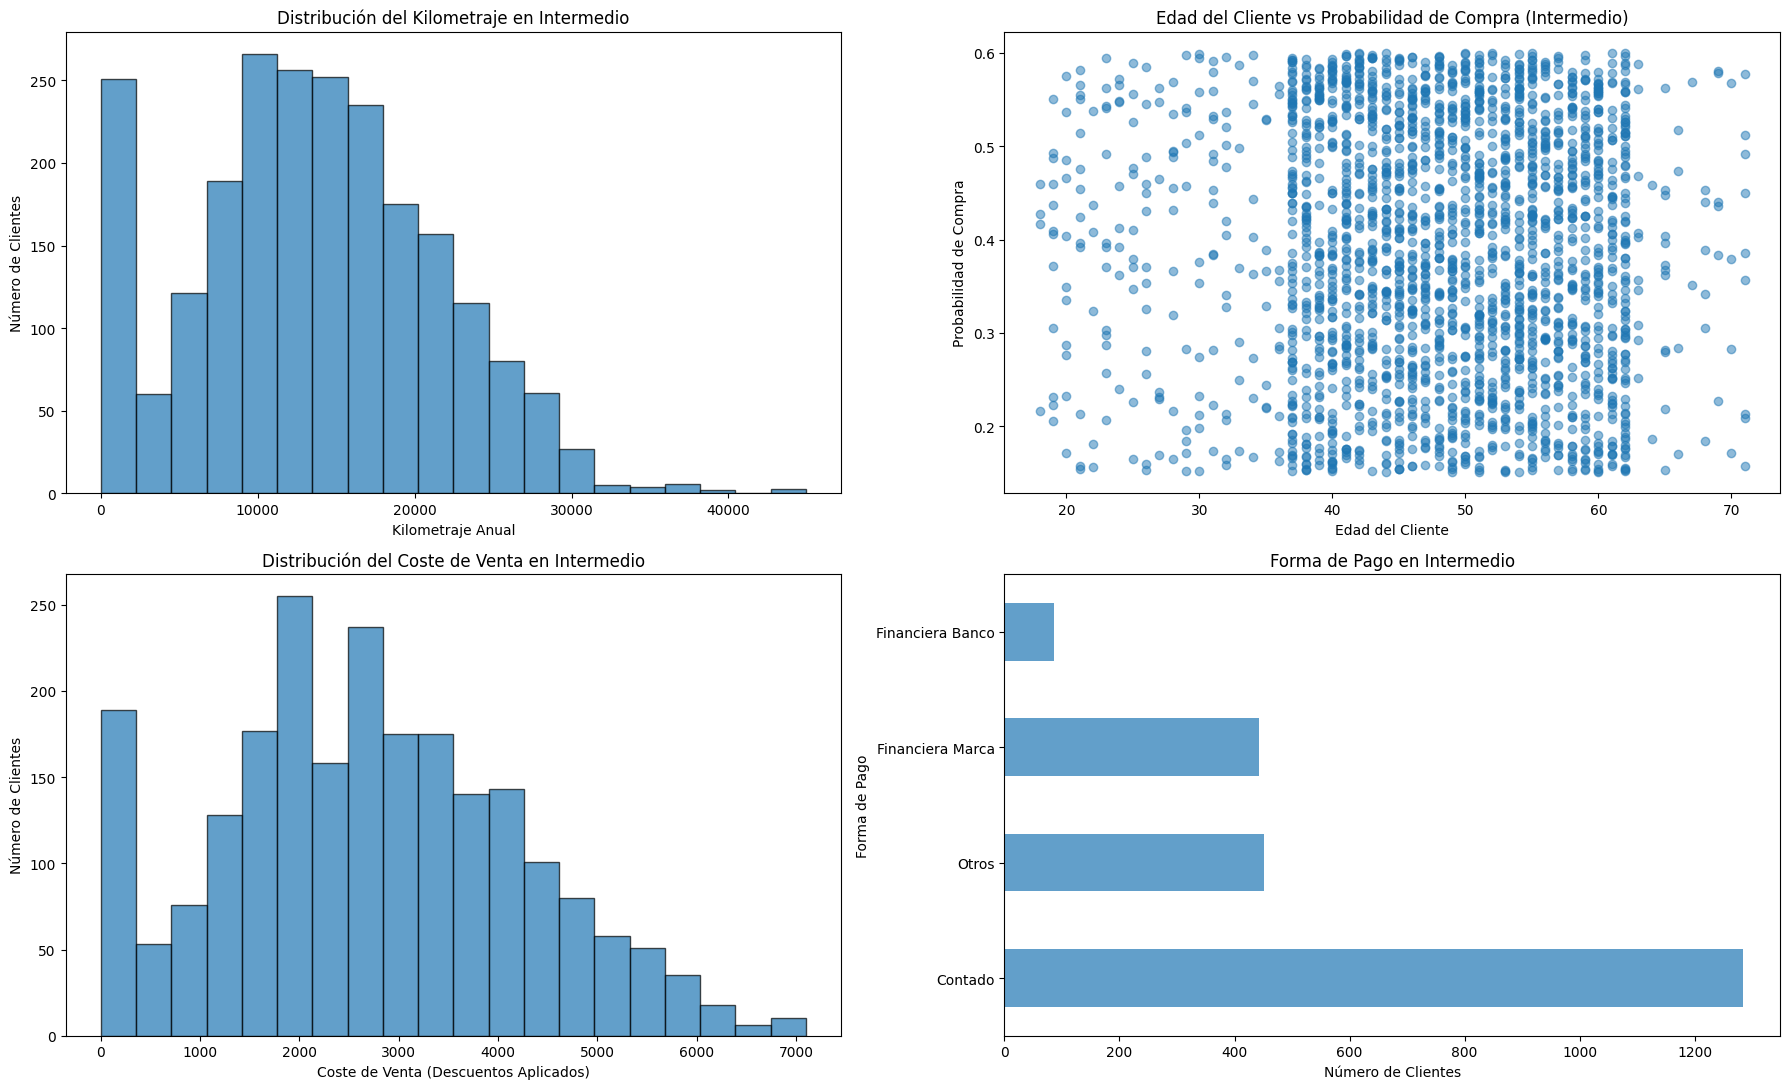

In [2019]:
fig, axs = plt.subplots(2, 2, figsize=(18, 11))

# Distribución del Kilometraje.
axs[0, 0].hist(intermedio_propension["km_anno"], bins=20, edgecolor='black', alpha=0.7)
axs[0, 0].set_title("Distribución del Kilometraje en Intermedio")
axs[0, 0].set_xlabel("Kilometraje Anual")
axs[0, 0].set_ylabel("Número de Clientes")

# Edad de Clientes.
axs[0, 1].scatter(intermedio_propension["Edad_Cliente"], intermedio_propension["Probabilidad_Compra"], alpha=0.5)
axs[0, 1].set_title("Edad del Cliente vs Probabilidad de Compra (Intermedio)")
axs[0, 1].set_xlabel("Edad del Cliente")
axs[0, 1].set_ylabel("Probabilidad de Compra")

# Distribución en Coste de Venta.
axs[1, 0].hist(intermedio_propension["COSTE_VENTA"], bins=20, edgecolor='black', alpha=0.7)
axs[1, 0].set_title("Distribución del Coste de Venta en Intermedio")
axs[1, 0].set_xlabel("Coste de Venta (Descuentos Aplicados)")
axs[1, 0].set_ylabel("Número de Clientes")

# Forma de Pago.
intermedio_propension["FORMA_PAGO"].value_counts().plot(kind='barh', alpha=0.7, ax=axs[1, 1])
axs[1, 1].set_title("Forma de Pago en Intermedio")
axs[1, 1].set_xlabel("Número de Clientes")
axs[1, 1].set_ylabel("Forma de Pago")

plt.tight_layout()
plt.show()

**Estrategias.**

**1. Distribución del Kilometraje.** La mayoría de los clientes tienen un **kilometraje bajo**, pero existe un grupo significativo con **kilometraje alto**.
- **Decisión Estratégica**:  **No invertir en campañas masivas**. En su lugar, implementar **campañas automatizadas dirigidas únicamente a clientes con alto kilometraje**.
  - “Tu coche ha recorrido **X km**, ¿es momento de cambiarlo? Te ofrecemos opciones adaptadas a tus necesidades”.

**2. Edad del Cliente.** Los **clientes jóvenes y de mediana edad tienen mayor probabilidad** de compra que los mayores de 50 años.
- **Decisión Estratégica**: **Segmentar la comunicación por edad**. A continuación se realiza un análisis de características por grupo de edad para proponer diferentes opciones. **Estrategias Personalizadas por Edad:**
  - **Menores de 35 Años:** Financiamiento accesible, modelos urbanos y eléctricos.

    - **Kilometraje**: Bajo, menos necesidad de renovación.
    - **Forma de Pago**: Variabilidad en métodos de pago.
    - **Tipo de Carrocería**: Prefieren modelos **compactos y urbanos**.
    - **Combustible**: Mayor interés en **eléctricos e híbridos**.
    - **Estrategia**:
      - **Financiamiento accesible** y beneficios adicionales (equipamiento, garantías).
      - Campañas sobre **modelos urbanos y eléctricos**.
  - **35-50 Años:** Descuentos estratégicos, SUVs y sedanes con mejores condiciones.
    - **Kilometraje**: Alto, mayor necesidad de renovación.
    - **Forma de Pago**: Métodos de pago más estables.
    - **Tipo de Carrocería**: Prefieren **SUVs y sedanes familiares**.
    - **Combustible**: Más tradicionales, pero abiertos a **híbridos**.
    - **Estrategia**:
      - **Descuentos estratégicos** en modelos específicos.
      - Campañas de renovación basadas en **kilometraje y seguridad**.


**3. Descuentos y Coste de Venta.** Los clientes intermedios **han recibido descuentos en el pasado**, lo que indica que algunos podrían ser sensibles al precio. Sin embargo, **no todos responden a descuentos directos**, por lo que hay que diversificar la estrategia.
- **Decisión Estratégica**: Asignar un **presupuesto moderado** para mejorar la conversión sin hacer ofertas agresivas. **Estrategias Clave**:
  - **Descuentos Condicionados:** Ofrecer **descuentos segmentados** según el historial de compra.  **Ejemplo**:
    - Si el cliente ha comprado antes con descuento, ofrecer un beneficio similar.
    - Si el cliente no ha respondido a descuentos previos, ofrecer una **opción de financiamiento mejorada** en vez de bajar el precio.
  - **Ofertas en Modelos Específicos:** Aplicar descuentos en **modelos que la marca necesita impulsar**, no en toda la gama.
  - **Bonificaciones en Servicios:** Incluir **beneficios en postventa** con coste controlado. **Ejemplo**:
    - **Mantenimiento bonificado por un año** si financian la compra.
    - **Seguro a precio reducido** si pagan al contado.

  - **Pruebas de Manejo con Incentivos.** Ofrecer una **experiencia de prueba de manejo con un incentivo** para clientes con alta interacción previa. **Ejemplo**: Cupón de gasolina o descuento en accesorios tras la prueba.  

- **Mensaje clave**:  “Renueva tu coche con **beneficios exclusivos**: descuentos segmentados, financiamiento flexible y servicios bonificados”.

**4. Forma de Pago.** Existen múltiples formas de pago en este segmento, lo que sugiere diferentes niveles de capacidad financiera.
- **Decisión Estratégica**: **Personalizar ofertas de financiamiento**:
  - Para clientes que financiaron antes, ofrecer **mejores condiciones** en su próxima compra.
  - Para quienes pagaron al contado, resaltar **descuentos exclusivos por pago inmediato**.

  - **Mensaje clave**: “¿Sabías que puedes adquirir tu próximo coche con **cuotas bajas y flexibles**? Descubre cómo financiar tu vehículo sin complicaciones”.

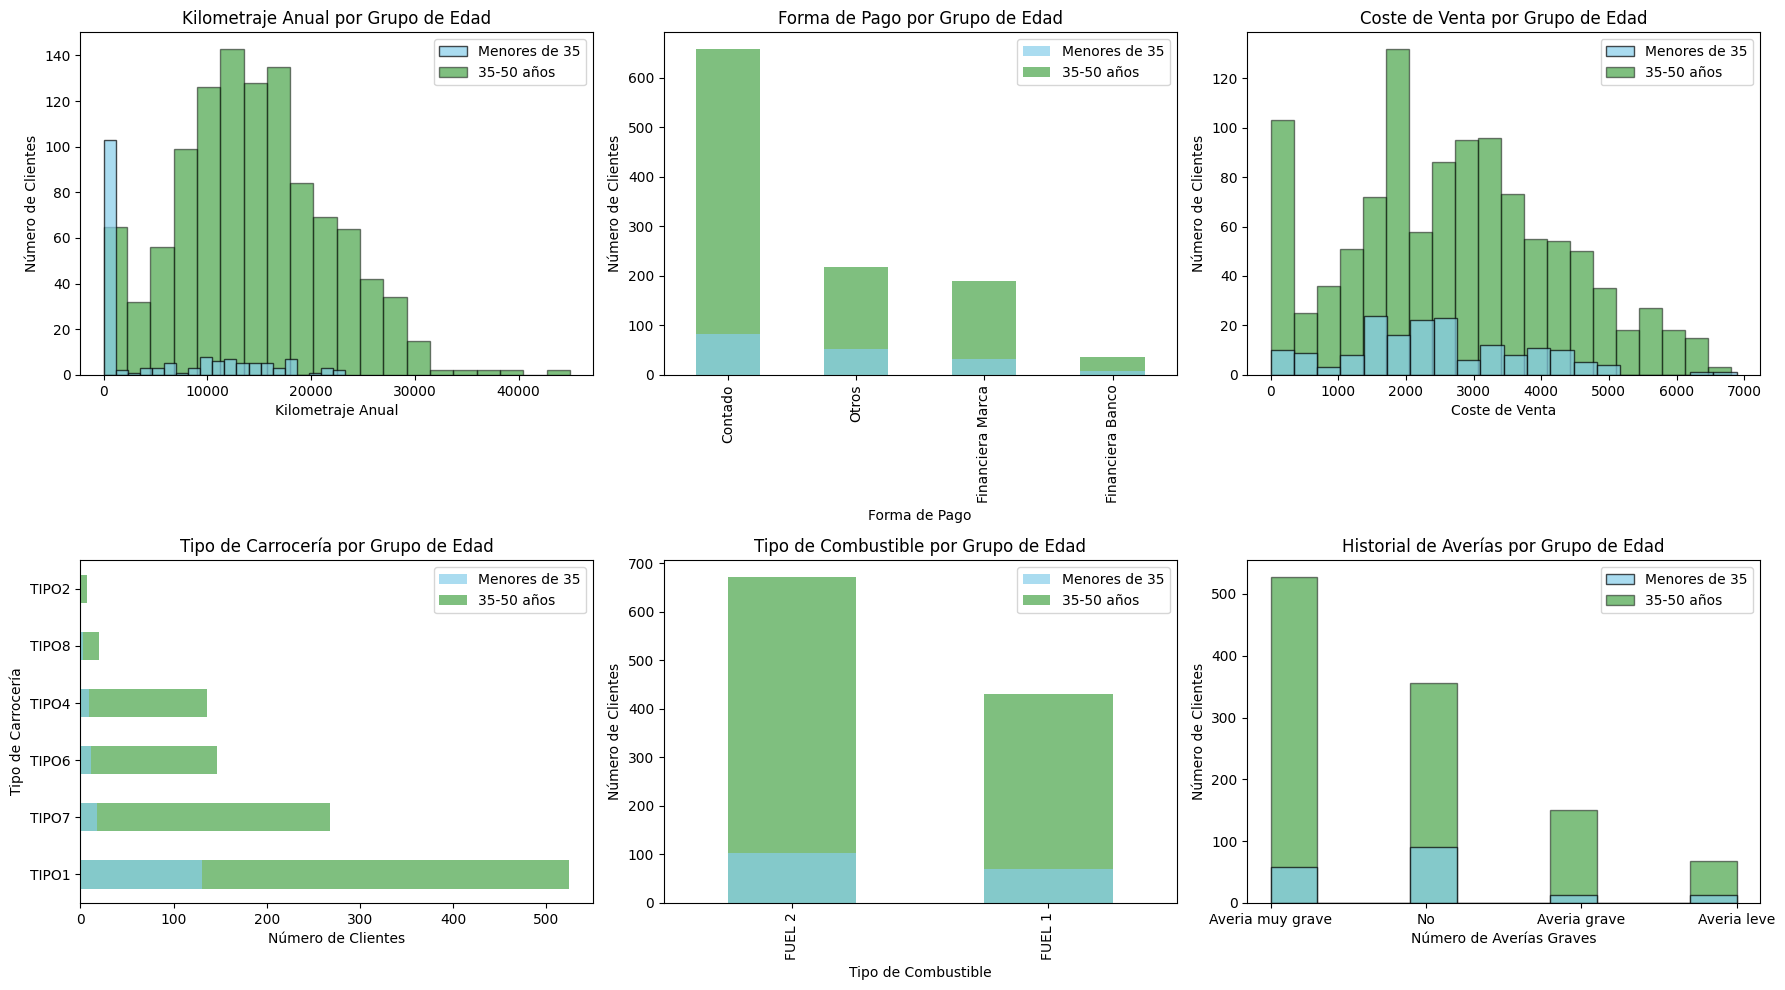

In [2020]:
# Filtrar clientes menores de 35 años y entre 35-50 años en el segmento Intermedio.
df_menores_35 = intermedio_propension[intermedio_propension["Edad_Cliente"] < 35]
df_35_50 = intermedio_propension[(intermedio_propension["Edad_Cliente"] >= 35) & (intermedio_propension["Edad_Cliente"] <= 50)]


fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Kilometraje Anual por Grupo de Edad.
axs[0, 0].hist(df_menores_35["km_anno"], bins=20, edgecolor='black', alpha=0.7, label="Menores de 35", color='skyblue', zorder = 2)
axs[0, 0].hist(df_35_50["km_anno"], bins=20, edgecolor='black', alpha=0.5, label="35-50 años", color='green')
axs[0, 0].set_title("Kilometraje Anual por Grupo de Edad")
axs[0, 0].set_xlabel("Kilometraje Anual")
axs[0, 0].set_ylabel("Número de Clientes")
axs[0, 0].legend()

# Forma de Pago por Grupo de Edad.
df_menores_35["FORMA_PAGO"].value_counts().plot(kind='bar', ax=axs[0, 1], alpha=0.7, color='skyblue', label="Menores de 35", zorder = 2)
df_35_50["FORMA_PAGO"].value_counts().plot(kind='bar', ax=axs[0, 1], alpha=0.5, color='green', label="35-50 años")
axs[0, 1].set_title("Forma de Pago por Grupo de Edad")
axs[0, 1].set_xlabel("Forma de Pago")
axs[0, 1].set_ylabel("Número de Clientes")
axs[0, 1].legend()

# Coste de Venta (Descuentos Aplicados) por Grupo de Edad.
axs[0, 2].hist(df_menores_35["COSTE_VENTA"], bins=20, edgecolor='black', alpha=0.7, label="Menores de 35", color='skyblue', zorder = 2)
axs[0, 2].hist(df_35_50["COSTE_VENTA"], bins=20, edgecolor='black', alpha=0.5, label="35-50 años", color='green')
axs[0, 2].set_title("Coste de Venta por Grupo de Edad")
axs[0, 2].set_xlabel("Coste de Venta")
axs[0, 2].set_ylabel("Número de Clientes")
axs[0, 2].legend()

# Tipo de Carrocería por Grupo de Edad.
df_menores_35["TIPO_CARROCERIA"].value_counts().plot(kind='barh', ax=axs[1, 0], alpha=0.7, color='skyblue', label="Menores de 35", zorder = 2)
df_35_50["TIPO_CARROCERIA"].value_counts().plot(kind='barh', ax=axs[1, 0], alpha=0.5, color='green', label="35-50 años")
axs[1, 0].set_title("Tipo de Carrocería por Grupo de Edad")
axs[1, 0].set_xlabel("Número de Clientes")
axs[1, 0].set_ylabel("Tipo de Carrocería")
axs[1, 0].legend()

# Tipo de Combustible por Grupo de Edad.
df_menores_35["COMBUSTIBLE"].value_counts().plot(kind='bar', ax=axs[1, 1], alpha=0.7, color='skyblue', label="Menores de 35", zorder = 2)
df_35_50["COMBUSTIBLE"].value_counts().plot(kind='bar', ax=axs[1, 1], alpha=0.5, color='green', label="35-50 años")
axs[1, 1].set_title("Tipo de Combustible por Grupo de Edad")
axs[1, 1].set_xlabel("Tipo de Combustible")
axs[1, 1].set_ylabel("Número de Clientes")
axs[1, 1].legend()

# Historial de Averías por Grupo de Edad.
axs[1, 2].hist(df_menores_35["Averia_grave"], bins=10, edgecolor='black', alpha=0.7, label="Menores de 35", color='skyblue', zorder = 2)
axs[1, 2].hist(df_35_50["Averia_grave"], bins=10, edgecolor='black', alpha=0.5, label="35-50 años", color='green')
axs[1, 2].set_title("Historial de Averías por Grupo de Edad")
axs[1, 2].set_xlabel("Número de Averías Graves")
axs[1, 2].set_ylabel("Número de Clientes")
axs[1, 2].legend()

# Ajustar diseño y mostrar gráficos
plt.tight_layout()
plt.show()

**Conclusión:** Para el **Segmento Intermedio**, las estrategias se centran en **personalizar ofertas** según características clave como **kilometraje, edad, forma de pago y sensibilidad a descuentos**. Se implementarán **campañas automatizadas** para clientes con alto kilometraje, destacando renovación y ahorro en mantenimiento. Para **menores de 35 años**, se ofrecerá financiamiento accesible y modelos urbanos/eléctricos, mientras que para **35-50 años**, se aplicarán descuentos estratégicos en SUVs y sedanes, enfocados en seguridad y kilometraje. Además, se usarán **descuentos condicionados**, bonificaciones en servicios (mantenimiento, seguros) y pruebas de manejo con incentivos. Finalmente, se personalizarán ofertas de financiamiento, mejorando condiciones para quienes ya financiaron y ofreciendo descuentos por pago al contado.

##### **Potencial.**
Este segmento tiene una **probabilidad de compra entre 55% y 85%**, lo que significa que hay un **alto retorno esperado** si aplicamos estrategias bien dirigidas. Aquí sí **invertiremos recursos**, pero de forma **estratégica**, priorizando acciones que maximicen la conversión.

In [2021]:
potencial_propension = df[df["Segmento"] == "Potencial"]

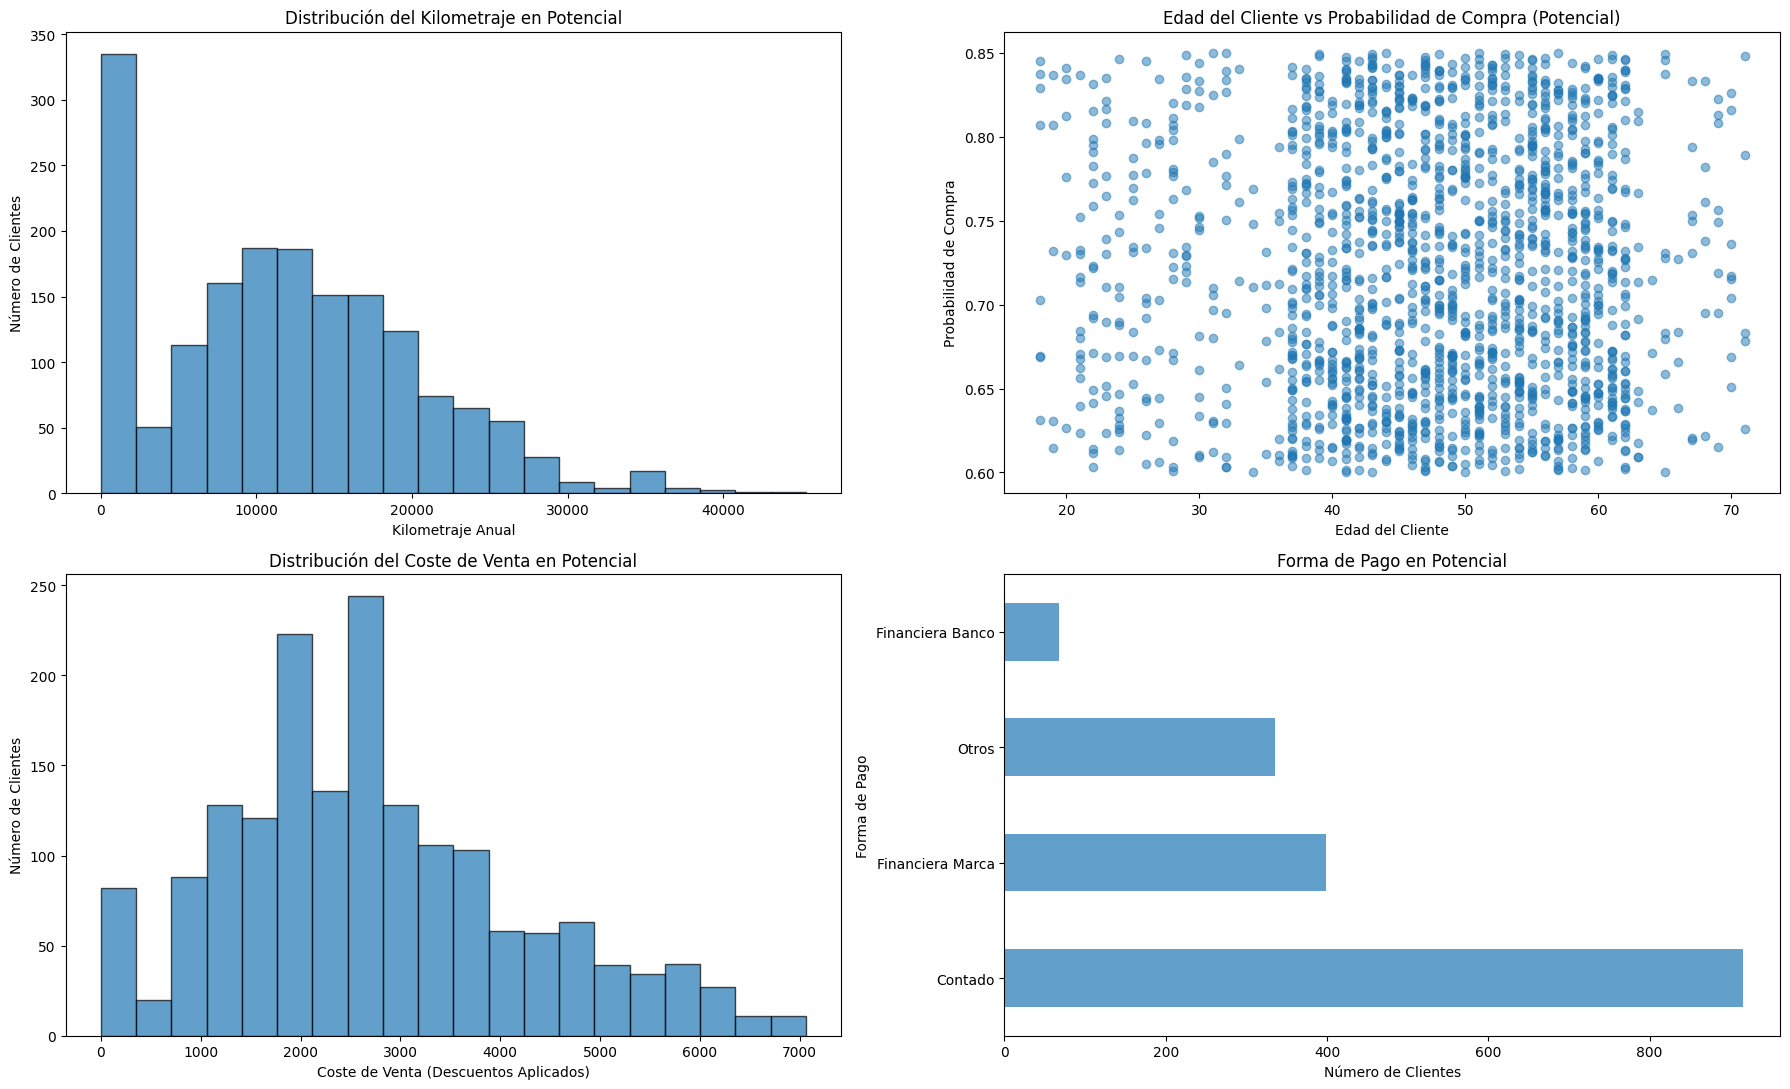

In [2022]:
fig, axs = plt.subplots(2, 2, figsize=(18, 11))

# Distribución del Kilometraje en Potencial.
axs[0, 0].hist(potencial_propension["km_anno"], bins=20, edgecolor='black', alpha=0.7)
axs[0, 0].set_title("Distribución del Kilometraje en Potencial")
axs[0, 0].set_xlabel("Kilometraje Anual")
axs[0, 0].set_ylabel("Número de Clientes")

# Edad del Cliente.
axs[0, 1].scatter(potencial_propension["Edad_Cliente"], potencial_propension["Probabilidad_Compra"], alpha=0.5)
axs[0, 1].set_title("Edad del Cliente vs Probabilidad de Compra (Potencial)")
axs[0, 1].set_xlabel("Edad del Cliente")
axs[0, 1].set_ylabel("Probabilidad de Compra")

# Distribución en Coste de Venta.
axs[1, 0].hist(potencial_propension["COSTE_VENTA"], bins=20, edgecolor='black', alpha=0.7)
axs[1, 0].set_title("Distribución del Coste de Venta en Potencial")
axs[1, 0].set_xlabel("Coste de Venta (Descuentos Aplicados)")
axs[1, 0].set_ylabel("Número de Clientes")

# Forma de Pago.
potencial_propension["FORMA_PAGO"].value_counts().plot(kind='barh', alpha=0.7, ax=axs[1, 1])
axs[1, 1].set_title("Forma de Pago en Potencial")
axs[1, 1].set_xlabel("Número de Clientes")
axs[1, 1].set_ylabel("Forma de Pago")

plt.tight_layout()
plt.show()

**Estrategias.**
**1. Distribución del Kilometraje.** Muchos clientes en este segmento tienen **alto kilometraje**, lo que sugiere **necesidad de renovación**.
- **Decisión Estratégica:**
  - **Subasta inversa**: Ofrecer una **valoración superior a la media** por su coche actual si lo entregan en parte de pago.
  - **Retos personalizados**: Enviar notificaciones tipo **"Estás a X km del mejor momento para cambiar de coche"** basadas en sus patrones de uso.

**2. Edad del Cliente.** Se identifican **tres grandes grupos etarios** con patrones de compra distintos:  
  - **Menores de 35 años:** Buscan **modelos tecnológicos, eléctricos o híbridos**, y financiamiento atractivo. **Decisión Estratégica:** Desbloqueo de beneficios si completan pasos en la app (ej. cotización, test drive, interacción con la marca).
  - **35-50 años:** Prefieren **SUVs y sedanes** con seguridad y beneficios familiares. **Decisión Estratégica:** Ofrecer un **programa de recompra garantizada** después de 3-5 años.
  - **Mayores de 50 años:** Buscan **confort y estabilidad en la inversión**. **Decisión Estratégica:** **Modelo "Try Before You Buy"** es decir, **Alquiler con opción a compra**, para reducir la barrera de entrada.

**3. Descuentos y Coste de Venta.** Este segmento **ha respondido a descuentos en el pasado**, pero necesita incentivos más sofisticados que simplemente bajar precios.
- **Decisión Estratégica:**
  - **Descuentos escalonados personalizados:** Basado en su **historial de compras o consultas previas**.
  - **Sistema de puntos:** En lugar de descuentos directos, ofrecer **créditos canjeables por mantenimiento, accesorios o recarga de batería (en eléctricos)**.
    - **Mensaje clave:** "Te recordamos que aún tienes una oferta especial en el modelo que consultaste. ¡Últimos días!"

**4. Forma de Pago.** En este segmento hay **clientes que ya han financiado antes y clientes que prefieren pagar al contado**.
- **Decisión Estratégica:** **Descuento en efectivo + cashback:** Para clientes que pagan al contado, en lugar de una rebaja en precio, ofrecer un **cashback en servicios de postventa**.

**Conclusión:** Para el **Segmento de Clientes Potenciales**, las estrategias se centran en **personalizar ofertas** según características clave como **kilometraje, edad, forma de pago y sensibilidad a descuentos**. Se implementarán **campañas automatizadas** para clientes con alto kilometraje, destacando renovación y ahorro en mantenimiento. Para **menores de 35 años**, se ofrecerá financiamiento accesible y modelos urbanos/eléctricos, mientras que para **35-50 años**, se aplicarán descuentos estratégicos en SUVs y sedanes, enfocados en seguridad y kilometraje. Además, se usarán **descuentos condicionados**, bonificaciones en servicios (mantenimiento, seguros) y pruebas de manejo con incentivos. Finalmente, se personalizarán ofertas de financiamiento, mejorando condiciones para quienes ya financiaron y ofreciendo descuentos por pago al contado.

##### **Premium.**
Este segmento tiene una probabilidad de compra superior al 85%, lo que significa que ya son clientes asegurados. La clave no es convencerlos de comprar, sino **mantenerlos fieles** a la marca con una inversión baja pero efectiva.

In [2023]:
premium_propension = df[df["Segmento"] == "Premium"]

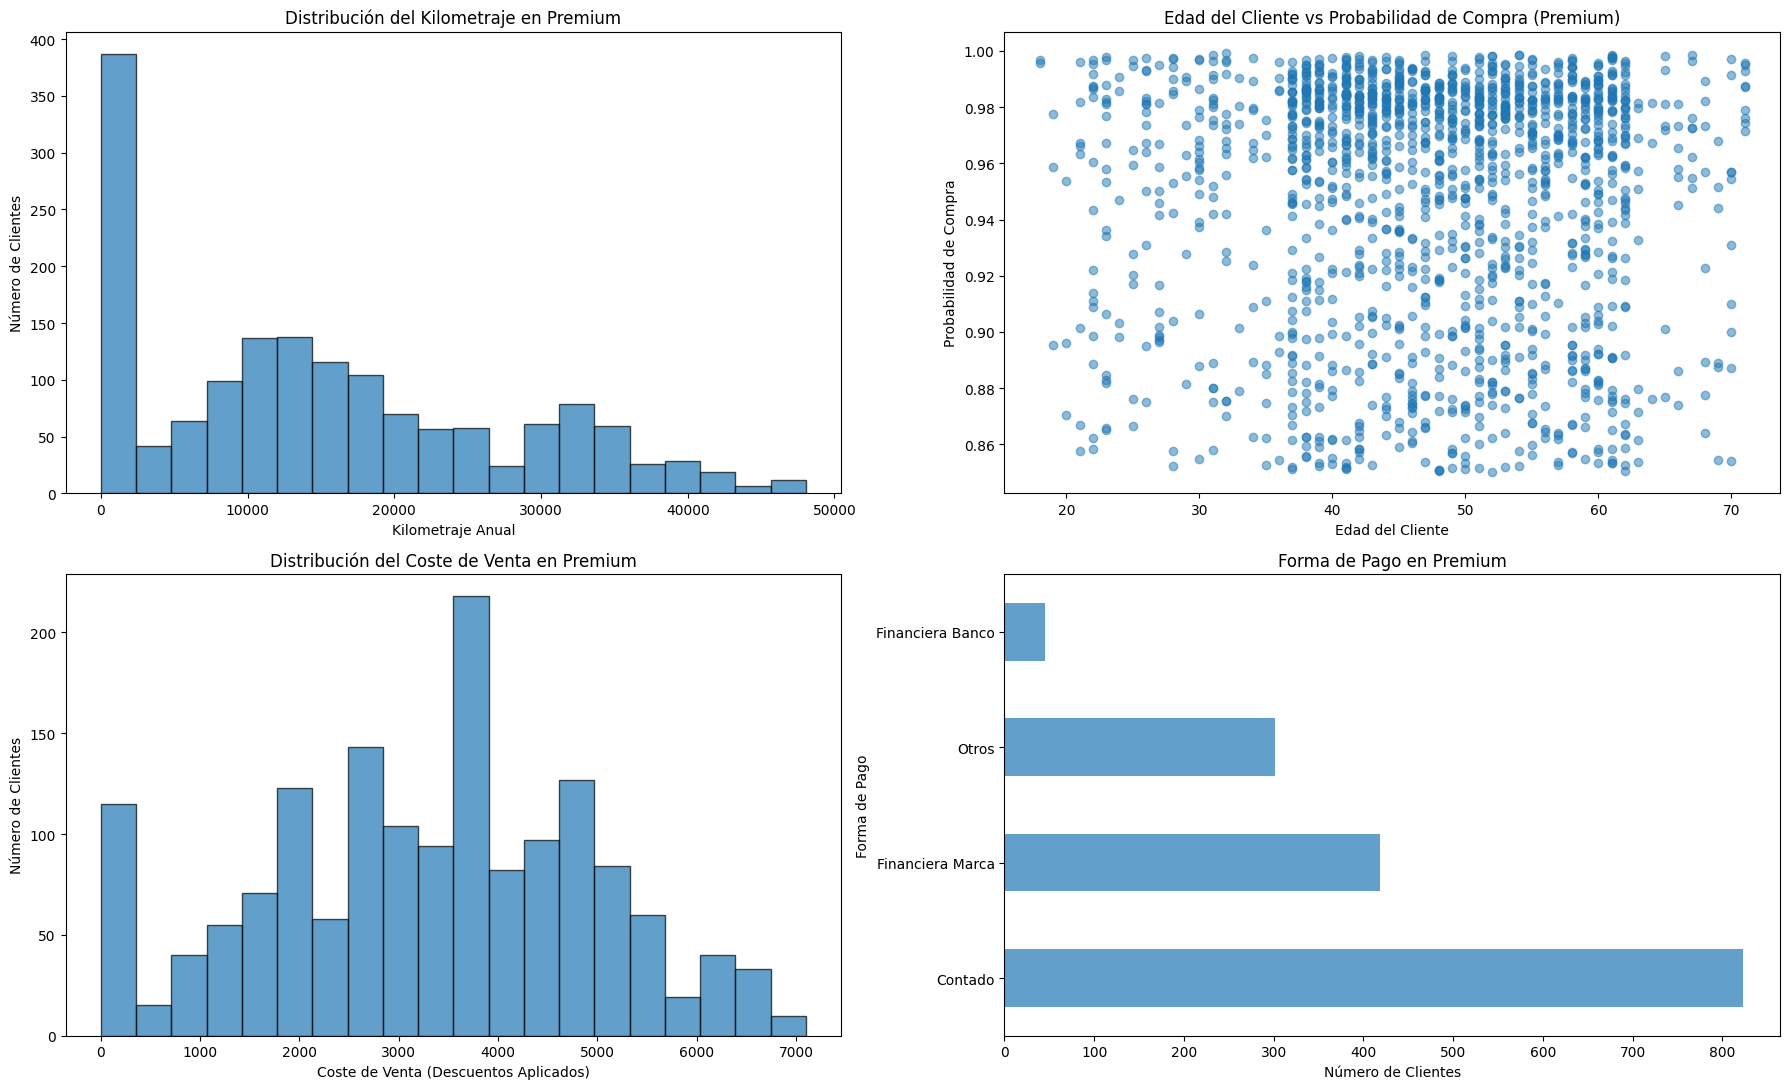

In [2024]:
fig, axs = plt.subplots(2, 2, figsize=(18, 11))

# Distribución del Kilometraje en Premium.
axs[0, 0].hist(premium_propension["km_anno"], bins=20, edgecolor='black', alpha=0.7)
axs[0, 0].set_title("Distribución del Kilometraje en Premium")
axs[0, 0].set_xlabel("Kilometraje Anual")
axs[0, 0].set_ylabel("Número de Clientes")

# Edad del Cliente.
axs[0, 1].scatter(premium_propension["Edad_Cliente"], premium_propension["Probabilidad_Compra"], alpha=0.5)
axs[0, 1].set_title("Edad del Cliente vs Probabilidad de Compra (Premium)")
axs[0, 1].set_xlabel("Edad del Cliente")
axs[0, 1].set_ylabel("Probabilidad de Compra")

# Distribución en Coste de Venta.
axs[1, 0].hist(premium_propension["COSTE_VENTA"], bins=20, edgecolor='black', alpha=0.7)
axs[1, 0].set_title("Distribución del Coste de Venta en Premium")
axs[1, 0].set_xlabel("Coste de Venta (Descuentos Aplicados)")
axs[1, 0].set_ylabel("Número de Clientes")

# Forma de Pago.
premium_propension["FORMA_PAGO"].value_counts().plot(kind='barh', alpha=0.7, ax=axs[1, 1])
axs[1, 1].set_title("Forma de Pago en Premium")
axs[1, 1].set_xlabel("Número de Clientes")
axs[1, 1].set_ylabel("Forma de Pago")

plt.tight_layout()
plt.show()

**Estrategias.**

**1. Distribución del Kilometraje.** Muchos clientes **no cambian de coche por necesidad, sino por estatus o tecnología**.
- **Decisión Estratégica:**
  - **Eventos VIP de presentación de nuevos modelos**: Organizar eventos exclusivos en concesionarios o circuitos de prueba.
  - **Acceso a ediciones especiales antes que el público general**: Notificarlos primero para generar fidelización.
  - **Mensaje clave:** "Eres parte de nuestra familia Premium. Descubre antes que nadie nuestras últimas novedades."

**2. Edad del Cliente.** Diferencias clave en el tipo de experiencia deseada según la edad:
  - **Menores de 40 años:** Buscan innovación y exclusividad digital. **Decisión Estratégica:** Invitaciones a experiencias tecnológicas exclusivas, como **test drives de vehículos eléctricos o autónomos**.
  - **Mayores de 40 años:** Valoran confort y trato preferencial. **Decisión Estratégica:** Invitaciones a **eventos privados de la marca**, como catas de vino o golf.
  - **Mensaje clave:** "Disfruta de experiencias únicas diseñadas exclusivamente para ti."

**3. Descuentos y Coste de Venta.** No necesitan descuentos, pero sí **valor añadido sin bajar el precio**. 
- **Decisión Estratégica:**
  - **Beneficios de postventa exclusivos**: Descuento en **detailing premium** o mantenimiento preferencial sin coste adicional.
  - **Regalo simbólico de marca**: Enviar un pequeño obsequio (ej. llavero de edición limitada, kit de limpieza exclusivo).
- **Mensaje clave:** "Gracias por ser parte de nuestra familia Premium. Disfruta de beneficios exclusivos solo para ti.

**4. Forma de Pago.** Su forma de pago no es un problema, pero ofrecerles **ventajas en futuras compras** los fideliza. **Decisión Estratégica:**
  - **Plan de recompra premium:** Garantizar que su vehículo tendrá **un valor de reventa asegurado** si deciden cambiarlo en el futuro.
  - **Acceso a financiamiento ultra flexible**: Aunque no lo necesiten, ofrecerles **posibilidades de pago personalizadas**.

**5. Tipo de Carrocería.** Estos clientes valoran **personalización y diferenciación** en sus vehículos.
- **Decisión Estratégica:**
  - **Eventos de personalización** donde pueden ver opciones de customización en vivo.
  - **Acceso a mejoras exclusivas** antes que el mercado general (ej. nuevo color especial, tecnología avanzada).
- **Mensaje clave:** "Personaliza tu coche con opciones exclusivas disponibles solo para ti."

**6. Tipo de Combustible.** Muchos están **explorando híbridos y eléctricos**, pero pueden dudar en la transición.
- **Decisión Estratégica:** **Carga gratuita por tiempo limitado en estaciones premium** para clientes que prueben un eléctrico.

**7. Historial de Averías.** Son muy exigentes con la fiabilidad del coche y esperan un servicio impecable.
- **Decisión Estratégica:**
  - **Mantenimiento express gratuito** una vez al año para revisión rápida (coste bajo para la marca).
  - **Prioridad en servicio técnico** sin costo adicional, para que nunca esperen en el taller.
- **Mensaje clave:** "Tu coche merece el mejor cuidado. Disfruta de mantenimiento express gratuito."


**Conclusión:** Para el **Segmento Premium**, la estrategia se centra en **fidelizar a clientes con alta probabilidad de compra** mediante **experiencias exclusivas y beneficios de postventa** sin incurrir en costos elevados. Se ofrecerán **eventos VIP, acceso prioritario a novedades, personalización de vehículos y mantenimiento preferencial**, evitando descuentos agresivos. La inversión será **baja pero efectiva**, enfocada en reforzar la exclusividad y el valor percibido.

#### **Do Something.**
El impacto de las estrategias de marketing se ha distribuido entre los diferentes segmentos de clientes en función de diversos factores, como el nivel de inversión y la receptividad del segmento. A continuación, se detallan las razones que justifican los porcentajes asignados a cada grupo:

**1. Segmento Premium**
- **Estrategias**: Se implementaron **experiencias exclusivas**, **acceso prioritario** y **beneficios de postventa**.
- **Razón del impacto esperado**: El segmento Premium ya tiene una **alta tasa de conversión** debido a su perfil de clientes leales y comprometidos. Las estrategias implementadas, como las experiencias exclusivas, están diseñadas para **fidelizar aún más** a este grupo, lo que explica el impacto moderado en la tasa de conversión.
- **Impacto esperado**: Un aumento de entre **3% y 5%** es plausible debido a la ya alta disposición de estos clientes a realizar compras.

**2. Segmento Potencial**
- **Estrategias**: **Descuentos segmentados**, **financiamiento flexible** y **test drives con incentivos**.
- **Razón del impacto esperado**: El segmento Potencial es muy **receptivo a incentivos** y estrategias personalizadas. Además, se ha **invertido más** en este grupo, lo que permite un **mayor enfoque** en estrategias de alto impacto. Los incentivos como los descuentos y el financiamiento flexible son muy efectivos en este grupo, lo que justifica un **aumento significativo** en la tasa de conversión.
- **Impacto esperado**: Se estima un aumento de entre **25% y 30%**, dado el enfoque intensivo en estrategias personalizadas y la mayor inversión realizada.

**3. Segmento Intermedio**
- **Estrategias**: **Descuentos condicionados**, **bonificaciones en servicios** y **campañas personalizadas** por edad y kilometraje.
- **Razón del impacto esperado**: Aunque este grupo tiene una tasa de conversión más baja, las estrategias de marketing están dirigidas a **personalizar la oferta** según sus necesidades específicas. Sin embargo, este segmento recibe **menos inversión** en comparación con los otros, lo que hace que el impacto de las estrategias sea **más moderado**.
- **Impacto esperado**: Se espera un aumento de entre **15% y 25%**, ya que las estrategias pueden mejorar la conversión, pero el impacto es limitado por la menor inversión.

**4. Segmento Baja Propensión**
- **Estrategias**: **Campañas de bajo costo**, **incentivos simbólicos** y **mantenimiento del contacto**.
- **Razón del impacto esperado**: El segmento Baja Propensión tiene una tasa de conversión extremadamente baja debido a que estos clientes son menos propensos a realizar una compra. Las **estrategias de bajo costo** y los **incentivos simbólicos** pueden tener un **impacto positivo**, pero el efecto sigue siendo limitado debido a la naturaleza del grupo. Aunque es un segmento difícil, el hecho de mantener contacto constante y ofrecer pequeños incentivos puede **aumentar ligeramente** la tasa de conversión.
- **Impacto esperado**: Un aumento de entre **5% y 10%** es realista, considerando que es un segmento con baja disposición a comprar.


In [2025]:
# Aumento de las tasas de conversión
conversion_rates["Premium"] *= 1.05  # Aumenta un 5%
conversion_rates["Potencial"] *= 1.30  # Aumenta un 30%
conversion_rates["Intermedio"] *=1.25 # Aumenta un 25%
conversion_rates["Baja Propensión"] *= 1.10  # Aumenta un 15%

In [2026]:
# Número de clientes convertidos por segmento usando las tasas de conversión definidas.
segment_counts["Clientes_Convertidos"] = round(segment_counts["Segmento"].map(conversion_rates) * segment_counts["Clientes"],3)

In [2027]:
segment_counts

,Segmento,Clientes,Clientes_Convertidos_NE,Clientes_Convertidos
0,Baja Propensión,5542,33.252,36.577
1,Intermedio,2265,520.950,651.188
2,Potencial,1719,928.260,1206.738
3,Premium,1588,1476.840,1550.682


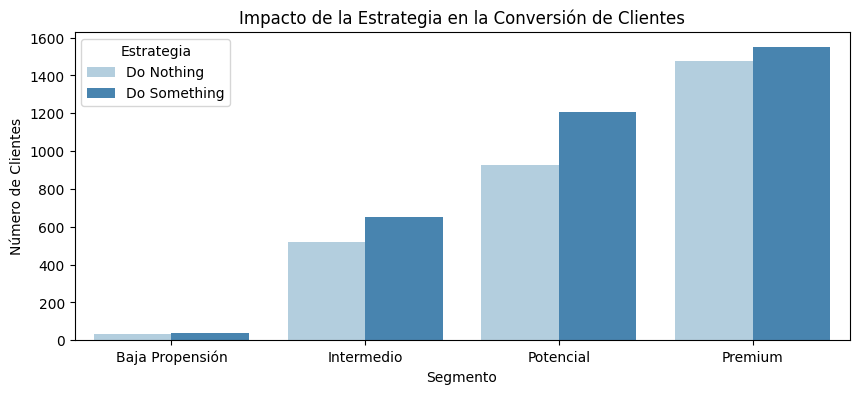

In [2031]:
plt.figure(figsize=(10, 4))
sns.barplot(data=segment_counts.melt(id_vars="Segmento", value_vars=["Clientes_Convertidos_NE", "Clientes_Convertidos"]),
            x="Segmento", y="value", hue="variable", palette="Blues", dodge=True, errorbar=None, order=["Baja Propensión", "Intermedio", "Potencial", "Premium"])

plt.title("Impacto de la Estrategia en la Conversión de Clientes")
plt.xlabel("Segmento")
plt.ylabel("Número de Clientes")
plt.legend(title="Estrategia", labels=["Do Nothing", "Do Something"])
plt.show()

Estos resultados reflejan un **impacto significativo en los segmentos Potencial e Intermedio**, donde se ha invertido más recursos. El segmento Premium ya tenía una tasa alta, por lo que el aumento es más modesto, mientras que el segmento Baja Propensión muestra un impacto limitado debido a su baja receptividad.